<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/DIFERENCIAS_FINITAS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de diferencias finitas(MDF) - Orden 4
Sea el problema de valor frontal(PVF):

$$   -u^{''}(x)=f(x) $$

con

$u(a)=u_{0}$, $u(b)=u_{n}$   y  $a<x<b$



El método consiste primero la aproximacion de la $u^{''}(x)$ con la formula diferencia divididas para la segunda derivada con orden 4:

$$u^{''}(x)=\frac{u(x-h)-2u(x)+u(x+h)}{h^{2}} + \frac{1}{12}(f(x-h)-2f(x)+f(x+h))+O(h^{4})$$


Reemplazando en la ecuacion inicial se tiene:

$$-u(x-h)+2u(x)-u(x+h)=\frac{h^{2}}{12}(f(x-h)+10f(x)+f(x+h))$$

En forma iterativa se tiene:

$$-u_{i-1}+2u_{i}-u_{i+1}=\frac{h^{2}}{12}(f_{i-1}+10f_{i}+f_{i+1})$$  para $i=\{1,...,n-1\}$

Haciendo el sistema de ecuaciones se tiene:

$$
\begin{bmatrix}
 2 & -1 & 0 & ... & 0 & 0 & 0 \\
-1 & 2 & -1 & ... & 0 & 0 & 0 \\
0 & -1 & 2 & ...& 0 & 0 & 0 \\
... & ... & ... & ...& ... & ... & ... \\
0 & 0 & 0 & ... & -1 & 2 & -1 \\
0 & 0 & 0 & ... & 0 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
...   \\
u_{n-2} \\
u_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\displaystyle h^{2}}{12} (f_{0}+10f_{1}+f_{2})+u_{0} \\
\frac{\displaystyle h^{2}}{12} (f_{1}+10f_{2}+f_{3})  \\
\frac{\displaystyle h^{2}}{12} (f_{2}+10f_{3}+f_{4}) \\
... \\
\frac{\displaystyle h^{2}}{12} (f_{n-1}+10f_{n-2}+f_{n-1})  \\
\frac{\displaystyle h^{2}}{12} (f_{n-2}+10f_{n-1}+f_{n})+u_{n}
\end{bmatrix}
$$

Asi se tiene el siguiente sistema lineal:

$$AU=F$$


Resolviendo el sistema anterior se obtiene el valor de U, obteniendo los valores $u_{i}$ para $i=\{1,..,n-1\}$


$$U=\begin{bmatrix}
u_{1} \\
u_{2} \\
u_{3} \\
...   \\
u_{n-2} \\
u_{n-1}
\end{bmatrix}$$

Asi la solucion total $\widetilde{U}$sera :

$$\widetilde{U}=\begin{bmatrix}
u_{0} \\
u_{1} \\
u_{2} \\
u_{3} \\
...   \\
u_{n-2} \\
u_{n-1} \\
u_{n}
\end{bmatrix}$$



CALCULO PARA LA ECUACION ONDA 1D - DIFERENCIAS FINITAS
#######################################################

------------------------------------------------------
[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA
------------------------------------------------------

Intervalo:
[a,b]=[0,1]

Condicion de contorno:
ua=u(0)=1 , ub=u(1)=-1

Numero de puntos:
16

Vector puntos x_i:
[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0]

------------------------------------------------------
[2] DEFINICION DE LA MATRIZ A
------------------------------------------------------

Matriz A:
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0

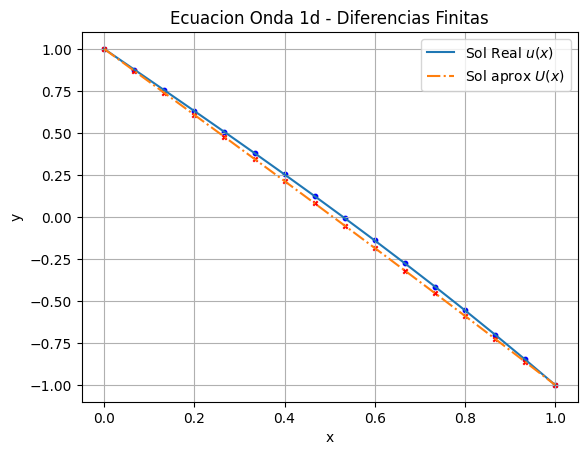

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

print("CALCULO PARA LA ECUACION ONDA 1D - DIFERENCIAS FINITAS")
print("#######################################################")

#[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA
print("\n------------------------------------------------------")
print("[1] DEFINICION DE PARAMETROS Y GENERACION DE LA MALLA")
print("------------------------------------------------------")
#limites del intervalo del espacio
a=0
b=1
#condiciones frontera
ua=1
ub=-1
#numero de puntos
n=8
#numero de elementos
m=n-1
#ancho de cada elemento
h=(b-a)/m
#total de puntos x
x=[a+i*h for i in range(0,m+1)]

print('\nIntervalo:')
print(f"[a,b]=[{a},{b}]")
print('\nCondicion de contorno:')
print(f"ua=u({a})={ua} , ub=u({b})={ub}")
print('\nNumero de puntos:')
print(n)
print('\nVector puntos x_i:')
print(x)

#[2] DEFINICION DE LA MATRIZ A
print("\n------------------------------------------------------")
print("[2] DEFINICION DE LA MATRIZ A")
print("------------------------------------------------------")
A=np.zeros((n-2,n-2))
for i in range(0,n-2):
  A[i,i]=2
for i in range(0,n-3):
  A[i,i+1]=A[i+1,i]=-1
print('\nMatriz A:')
print(A)

#[3] DEFINICION DE LA MATRIZ DE CARGA F
print("\n------------------------------------------------------")
print("[3] DEFINICION DE LA MATRIZ DE CARGA F")
print("------------------------------------------------------")
#definicion del vector f de la ecuacion inicial
def f(x):
  return np.sin(x)
F=np.zeros((n-2,1))
for i in range(0,n-2):
  F[i]=(f(x[i])+f(x[i+1])+f(x[i+2]))*(h**2)/12
F[0]= F[0]+ua
F[n-3]=F[n-3]+ub
print("\nMatriz F:")
print(F)

#[4] RESOLUCION DEL SISTEMA DE ECUACION
print("\n------------------------------------------------------")
print("[4] RESOLUCION DEL SISTEMA DE ECUACION")
print("------------------------------------------------------")
# Calcular la inversa de la matriz
A_inv = np.linalg.inv(A)
# Calculo de la solucion aproximada
U=np.zeros((n,1))
U[0]=ua
U[n-1]=ub
U[1:n-1]=A_inv@F
print('\nSolucion aproximada U:')
print(U)

#[5] PLOTEO DE LA SOLUCION REAL Y APROXIMADA
print("\n------------------------------------------------------")
print("[5] PLOTEO DE LA SOLUCION REAL Y APROXIMADA")
print("------------------------------------------------------")
#definicion de la solucion real para evaluarlo con listas
def u_r(x):
  return np.sin(x) + (-2 - np.sin(1))*np.array(x) + 1

# Definir la función que queremos plotear
y = u_r(x)  # Calcular los valores de y usando la función u_r

# Crear el gráfico
plt.plot(x, y, label='Sol Real $u(x)$')
plt.plot(x, U, label='Sol aprox $U(x)$',linestyle='-.')

# Añadir los puntos en el gráfico
plt.scatter(x, y, color='blue', s=10, marker='o')
plt.scatter(x, U, color='red', s=10, marker='x')
#plt.plot(RK4[:,0],RK4[:,1],'-.')

# Añadir títulos y etiquetas
plt.title('Ecuacion Onda 1d - Diferencias Finitas')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Añadir cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()
